In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for nicer plots
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('data/Sample - Superstore.csv', encoding='ISO-8859-1')


# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Shape and column names
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Info
df.info()

# Check for nulls
df.isnull().sum()


Shape: (9994, 21)

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Confirm the new column names
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [6]:
# Check how many nulls per column
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df = df.drop(columns=['Postal Code'])


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [9]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')


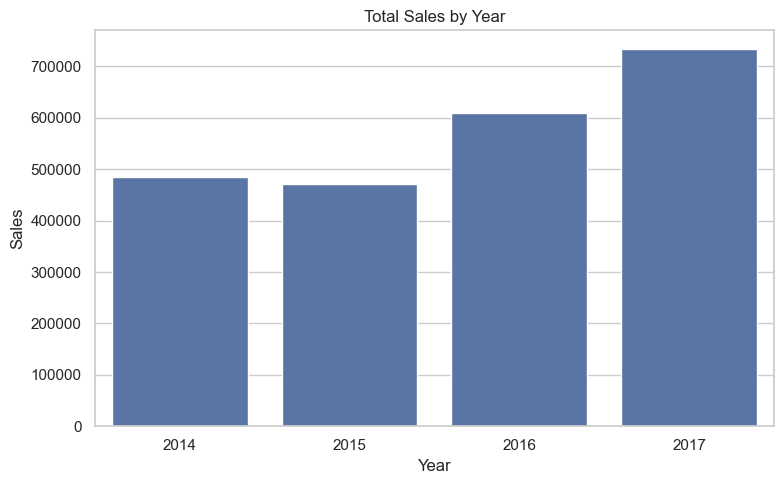

In [10]:
sales_year = df.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sales_year, x='Order Year', y='Sales')
plt.title('Total Sales by Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


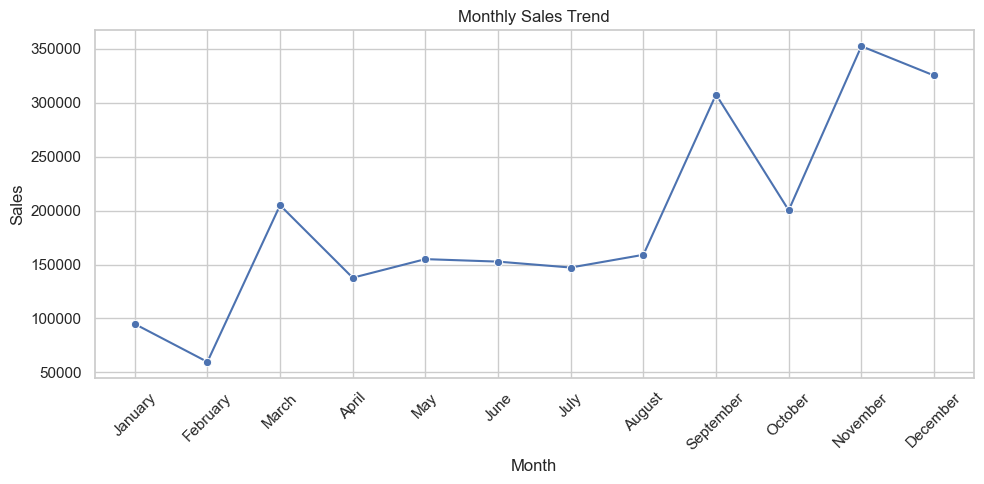

In [11]:
sales_month = df.groupby('Order Month Name')['Sales'].sum().reset_index()
# Optional: sort months in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
sales_month['Order Month Name'] = pd.Categorical(sales_month['Order Month Name'], categories=months_order, ordered=True)
sales_month = sales_month.sort_values('Order Month Name')

plt.figure(figsize=(10,5))
sns.lineplot(data=sales_month, x='Order Month Name', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

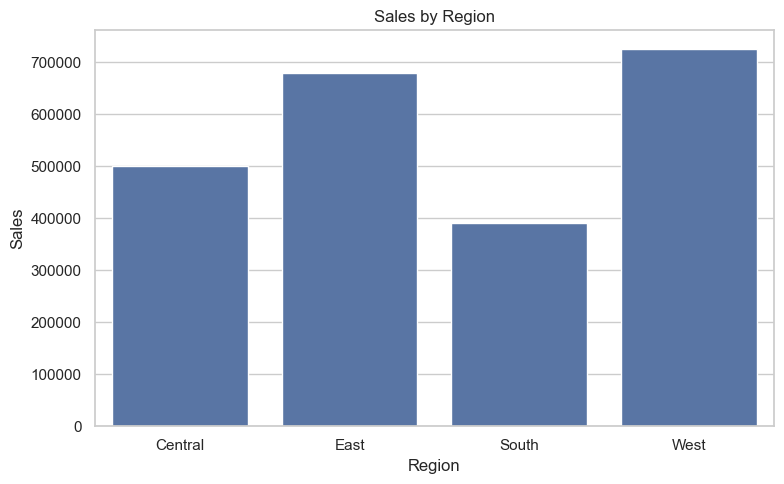

In [12]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


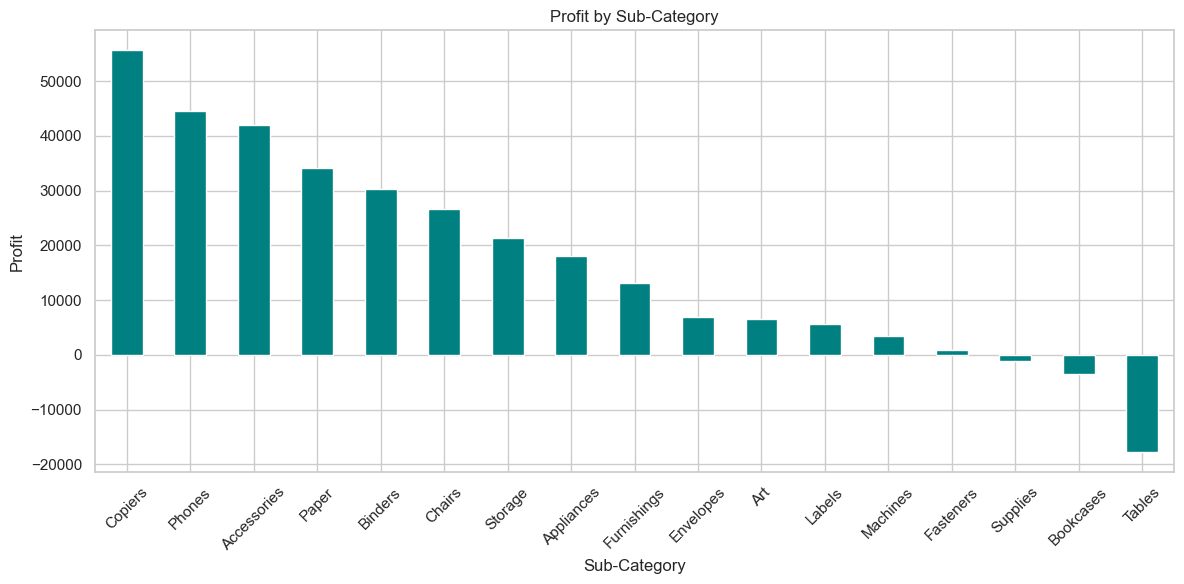

In [13]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
subcat_profit.plot(kind='bar', color='teal')
plt.title('Profit by Sub-Category')
plt.ylabel('Profit')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


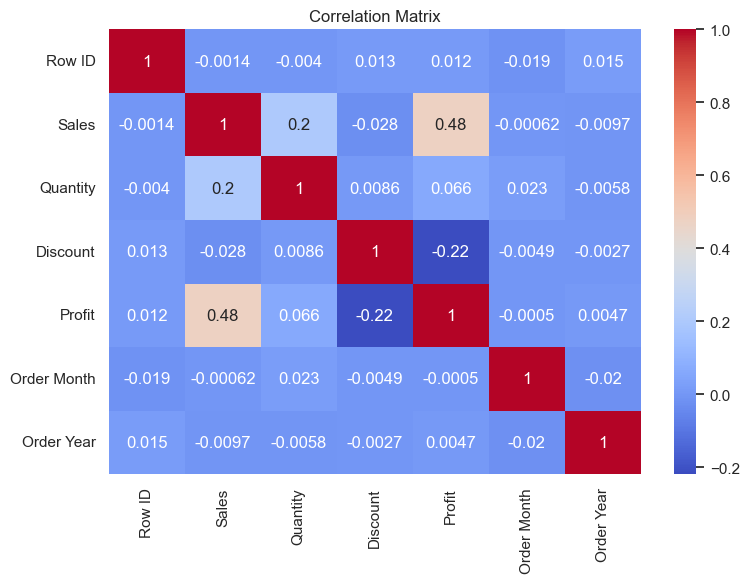

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


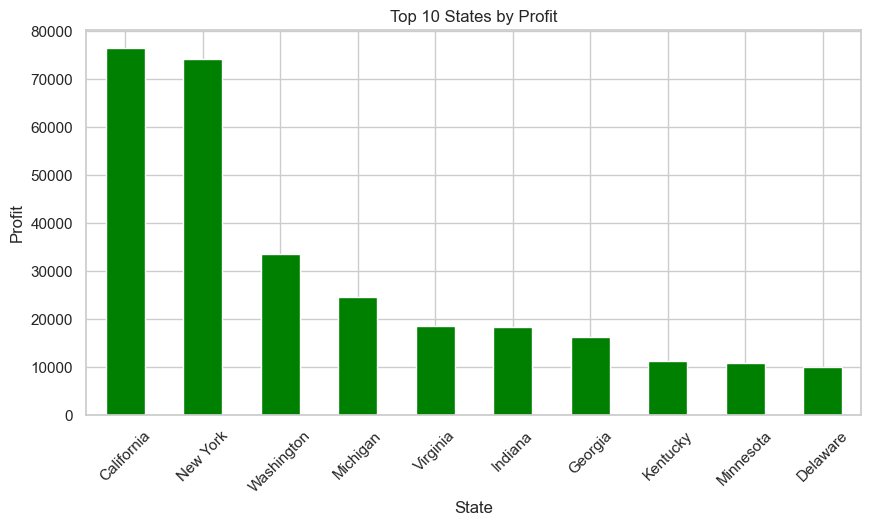

In [15]:
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

state_profit.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 10 States by Profit")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()


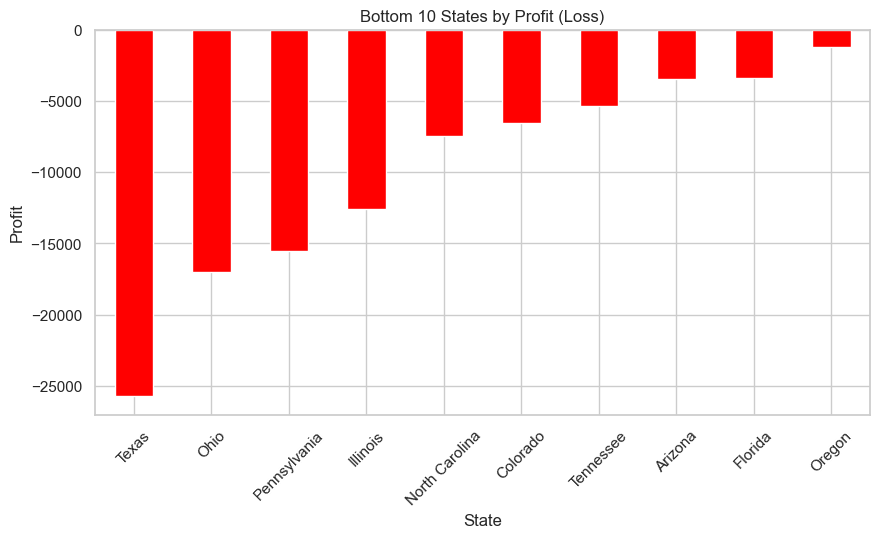

In [16]:
loss_states = df.groupby('State')['Profit'].sum().sort_values().head(10)

loss_states.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Bottom 10 States by Profit (Loss)")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()
